In [61]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt


In [62]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [63]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


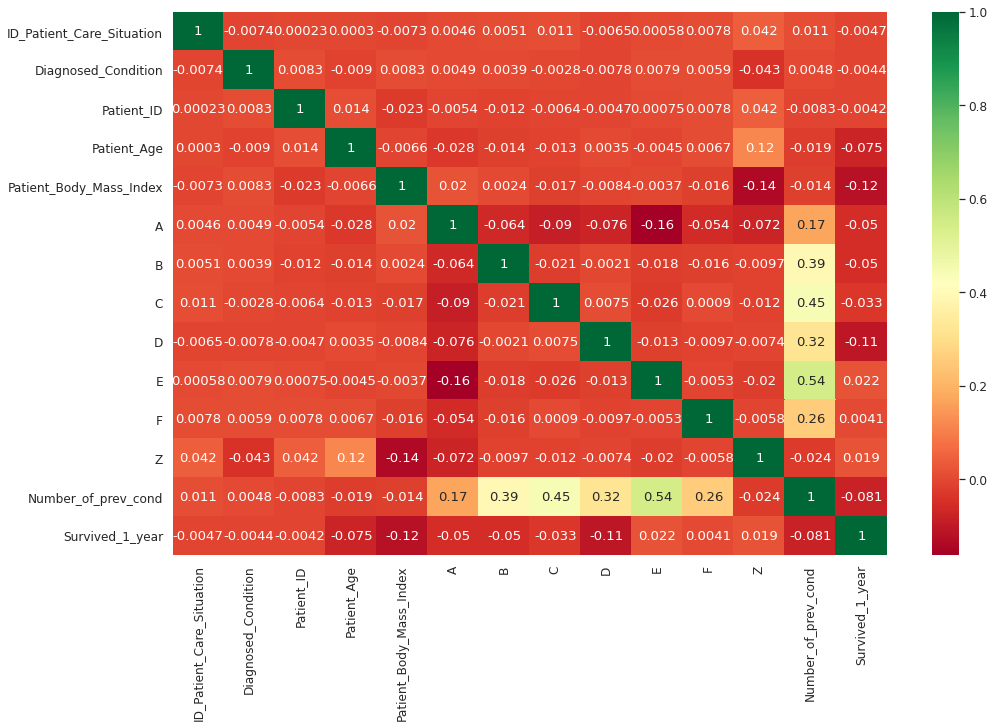

In [64]:
plt.figure(figsize=(16,10))
sbn.set(font_scale=1.1)
sbn.heatmap(pharma_data.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [65]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [66]:
pharma_data_cat_conv=pd.get_dummies(pharma_data, columns=["Treated_with_drugs","Patient_Smoker","Patient_Rural_Urban","Patient_mental_condition"])

In [67]:
pharma_data_cat_conv.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,22374,8,3333,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
1,18164,5,5740,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,6283,23,10446,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
3,5339,51,12011,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,33012,0,12513,128,1.348400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [68]:
pharma_data_cat_conv.isna().sum()

ID_Patient_Care_Situation                     0
Diagnosed_Condition                           0
Patient_ID                                    0
Patient_Age                                   0
Patient_Body_Mass_Index                       0
A                                          1235
B                                          1235
C                                          1235
D                                          1235
E                                          1235
F                                          1235
Z                                          1235
Number_of_prev_cond                        1235
Survived_1_year                               0
Treated_with_drugs_DX1                        0
Treated_with_drugs_DX1 DX2                    0
Treated_with_drugs_DX1 DX2 DX3                0
Treated_with_drugs_DX1 DX2 DX3 DX4            0
Treated_with_drugs_DX1 DX2 DX3 DX4 DX5        0
Treated_with_drugs_DX1 DX2 DX3 DX5            0
Treated_with_drugs_DX1 DX2 DX4          

In [69]:
pharma_data_cat_conv['Number_of_prev_cond'].fillna(pharma_data_cat_conv['Number_of_prev_cond'].mode()[0],inplace=True)

In [70]:
pharma_data_cat_conv['A'].fillna(pharma_data_cat_conv['A'].mode()[0],inplace=True)
pharma_data_cat_conv['B'].fillna(pharma_data_cat_conv['B'].mode()[0],inplace=True)
pharma_data_cat_conv['C'].fillna(pharma_data_cat_conv['C'].mode()[0],inplace=True)
pharma_data_cat_conv['D'].fillna(pharma_data_cat_conv['D'].mode()[0],inplace=True)
pharma_data_cat_conv['E'].fillna(pharma_data_cat_conv['E'].mode()[0],inplace=True)
pharma_data_cat_conv['F'].fillna(pharma_data_cat_conv['F'].mode()[0],inplace=True)
pharma_data_cat_conv['Z'].fillna(pharma_data_cat_conv['Z'].mode()[0],inplace=True)



In [71]:
pharma_data_cat_conv.isna().sum()

ID_Patient_Care_Situation                  0
Diagnosed_Condition                        0
Patient_ID                                 0
Patient_Age                                0
Patient_Body_Mass_Index                    0
A                                          0
B                                          0
C                                          0
D                                          0
E                                          0
F                                          0
Z                                          0
Number_of_prev_cond                        0
Survived_1_year                            0
Treated_with_drugs_DX1                     0
Treated_with_drugs_DX1 DX2                 0
Treated_with_drugs_DX1 DX2 DX3             0
Treated_with_drugs_DX1 DX2 DX3 DX4         0
Treated_with_drugs_DX1 DX2 DX3 DX4 DX5     0
Treated_with_drugs_DX1 DX2 DX3 DX5         0
Treated_with_drugs_DX1 DX2 DX4             0
Treated_with_drugs_DX1 DX2 DX4 DX5         0
Treated_wi

In [72]:

y = pharma_data_cat_conv[['Survived_1_year']]  # target variable i.e diabetic or not
X = pharma_data_cat_conv.drop(['Survived_1_year'], axis=1)  # input variables

In [73]:
X=X.drop(['Patient_ID','ID_Patient_Care_Situation'], axis=1)

In [74]:
X=X.drop(['Number_of_prev_cond'], axis=1)

In [75]:
X.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
1,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
3,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,0,128,1.348400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [76]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X)

# transform training data
X_norm = norm.transform(X)



In [77]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test =train_test_split(X_norm, y, 
                                                    test_size=0.1, 
                                                    random_state=1)

In [80]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_lr = XGBClassifier(learning_rate =0.1,
n_estimators=500,
max_depth=5,
min_child_weight=1,
gamma=0,
subsample=0.8,
colsample_bytree=0.8,
objective= 'binary:logistic',
nthread=4,
scale_pos_weight=1,
seed=27)


optimization_dict = {"n_estimators"     : [200,500,800,1100,1400,1700,2000],
 "learning_rate"    : [0.01, 0.10, 0.3, 0.5, 0.7, 1 ] ,
 "max_depth"        : [ 3, 5, 7,9, 11,14,17],
 "subsample"        :[0.2,0.5,1],
 "min_child_weight" : [0.2, 0.5, 1, 3, 5, 7,10,15,20 ],
 "gamma"            : [ 0.0, 0.3, 0.7 , 1, 5,10,15 ],
 "reg_lambda"            : [ 0 ],
"reg_alpha"            : [ 1 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7,1 ] }
model = RandomizedSearchCV(clf_lr, optimization_dict, 
                     scoring='roc_auc', verbose=1,n_jobs=4,iid=False, cv=5)
lr_baseline_model = model.fit(X_train,y_train)


In [ ]:
lr_baseline_model.best_params_, lr_baseline_model.best_score_

In [94]:
model = XGBClassifier(learning_rate =0.1,
 n_estimators=2000,
 max_depth=9,
 min_child_weight=5,
 gamma=5,
 subsample=1,
 colsample_bytree=0.3,
 reg_lambda=0,
 reg_alpha=1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 random_state=1)
lr_baseline_model_op = model.fit(X_train,y_train)
y_pred = lr_baseline_model_op.predict(X_test)
y_pred_train=lr_baseline_model_op.predict(X_train)
#scores = cross_val_score(clf_lr, X_train, y_train, cv=5,scoring='f1_macro')
# Calculating the accuracy and F1 Score by comparing the actual and predicted values
ac = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test ,y_pred)
ac_train = accuracy_score(y_train, y_pred_train)

print("Baseline Model Accuracy:", ac)
print("Baseline Model F1 Score:", f_score)
print("Baseline Model Accuracy train:", ac_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Baseline Model Accuracy: 0.8502164502164502
Baseline Model F1 Score: 0.8810996563573884
Baseline Model Accuracy train: 0.8637610044739501


In [95]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [96]:
test_new.isna().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [97]:
test_new=pd.get_dummies(test_new, columns=["Treated_with_drugs","Patient_Smoker","Patient_Rural_Urban","Patient_mental_condition"])

In [98]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID_Patient_Care_Situation                9303 non-null   int64  
 1   Diagnosed_Condition                      9303 non-null   int64  
 2   Patient_ID                               9303 non-null   int64  
 3   Patient_Age                              9303 non-null   int64  
 4   Patient_Body_Mass_Index                  9303 non-null   float64
 5   A                                        9303 non-null   float64
 6   B                                        9303 non-null   float64
 7   C                                        9303 non-null   float64
 8   D                                        9303 non-null   float64
 9   E                                        9303 non-null   float64
 10  F                                        9303 no

In [99]:
test_new.loc[:,'Patient_Smoker_Cannot say']=0

In [100]:
test_new = test_new[['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'A',
       'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Treated_with_drugs_DX1 ', 'Treated_with_drugs_DX1 DX2 ',
       'Treated_with_drugs_DX1 DX2 DX3 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX5 ', 'Treated_with_drugs_DX1 DX3 ',
       'Treated_with_drugs_DX1 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX3 DX5 ', 'Treated_with_drugs_DX1 DX4 ',
       'Treated_with_drugs_DX1 DX4 DX5 ', 'Treated_with_drugs_DX1 DX5 ',
       'Treated_with_drugs_DX2 ', 'Treated_with_drugs_DX2 DX3 ',
       'Treated_with_drugs_DX2 DX3 DX4 ',
       'Treated_with_drugs_DX2 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX2 DX3 DX5 ', 'Treated_with_drugs_DX2 DX4 ',
       'Treated_with_drugs_DX2 DX4 DX5 ', 'Treated_with_drugs_DX2 DX5 ',
       'Treated_with_drugs_DX3 ', 'Treated_with_drugs_DX3 DX4 ',
       'Treated_with_drugs_DX3 DX4 DX5 ', 'Treated_with_drugs_DX3 DX5 ',
       'Treated_with_drugs_DX4 ', 'Treated_with_drugs_DX4 DX5 ',
       'Treated_with_drugs_DX5 ', 'Treated_with_drugs_DX6','Patient_Smoker_Cannot say',
       'Patient_Smoker_NO', 'Patient_Smoker_YES', 'Patient_Rural_Urban_RURAL',
       'Patient_Rural_Urban_URBAN', 'Patient_mental_condition_Stable',
       ]]

In [101]:
test_new.drop('Number_of_prev_cond',axis=1,inplace=True)

In [102]:
test_new.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,40,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
1,52,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1
2,50,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
3,32,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1
4,20,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1


In [103]:
test_new_norm = pd.DataFrame(norm.transform(test_new),columns=['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47'])

In [104]:
from sklearn.metrics import accuracy_score, f1_score

# finding our predicted values
Survived_1_year= lr_baseline_model_op.predict(test_new_norm)



In [105]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(Survived_1_year) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_new_norm.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results_HP.csv')         
files.download('prediction_results_HP.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>